In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('uber.csv')

In [9]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [15]:
df.drop(['Unnamed: 0', 'key'],axis = 1, inplace =True)

In [16]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['time'] = df['pickup_datetime'].dt.time

In [19]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,time
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,19:52:06
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,Friday,20:04:56
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,Monday,21:45:00
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,Friday,08:22:21
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,17:47:00


In [21]:
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [22]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,19:52:06
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,20:04:56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,21:45:00
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,08:22:21
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,17:47:00


In [24]:
def haversine(lon1,lat1,lon2,lat2):
  lon1,lat1,lon2,lat2 = map(np.radians, [lon1,lat1,lon2,lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
  c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
  km = 6371 * c
  return km

df['dist_km'] = df.apply(lambda row: haversine  (row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']), axis=1)

In [26]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [27]:
df.head()

,fare_amount,passenger_count,day_of_week,time,dist_km
0,7.5,1,Thursday,19:52:06,1.683323
1,7.7,1,Friday,20:04:56,2.457590
2,12.9,1,Monday,21:45:00,5.036377
3,5.3,3,Friday,08:22:21,1.661683
4,16.0,5,Thursday,17:47:00,4.475450


In [28]:
def is_rush_hour(datetime):
  hour = datetime.hour
  return (5 <= hour <= 10) or (17 <= hour <= 22)
df['rush_hour'] = df['time'].apply(is_rush_hour)
df.head()

,fare_amount,passenger_count,day_of_week,time,dist_km,rush_hour
0,7.5,1,Thursday,19:52:06,1.683323,True
1,7.7,1,Friday,20:04:56,2.457590,True
2,12.9,1,Monday,21:45:00,5.036377,True
3,5.3,3,Friday,08:22:21,1.661683,True
4,16.0,5,Thursday,17:47:00,4.475450,True


In [29]:
df.drop('time',axis=1, inplace=True)

In [30]:
df.head()

,fare_amount,passenger_count,day_of_week,dist_km,rush_hour
0,7.5,1,Thursday,1.683323,True
1,7.7,1,Friday,2.457590,True
2,12.9,1,Monday,5.036377,True
3,5.3,3,Friday,1.661683,True
4,16.0,5,Thursday,4.475450,True


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['rush_hour'] = le.fit_transform(df['rush_hour'])

In [33]:
df.head()

,fare_amount,passenger_count,day_of_week,dist_km,rush_hour
0,7.5,1,4,1.683323,1
1,7.7,1,0,2.457590,1
2,12.9,1,1,5.036377,1
3,5.3,3,0,1.661683,1
4,16.0,5,4,4.475450,1


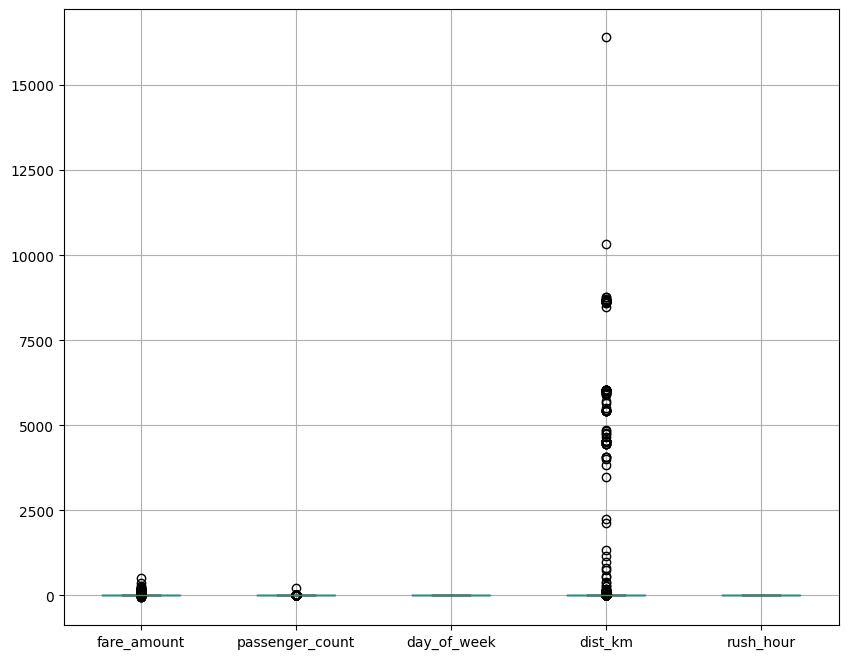

In [34]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.show()

In [35]:
def remove_outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisk = Q1 - 1.5* IQR
  upper_whisk = Q3 + 1.5* IQR
  df[col] = np.clip(df[col],lower_whisk,upper_whisk)
  return df

def treat_out_all(df,col_list):
  for col in col_list:
    df = remove_outliers(df,col)
  return df

cols = ['fare_amount', 'passenger_count', 'day_of_week', 'dist_km', 'rush_hour']
df = treat_out_all(df,cols)

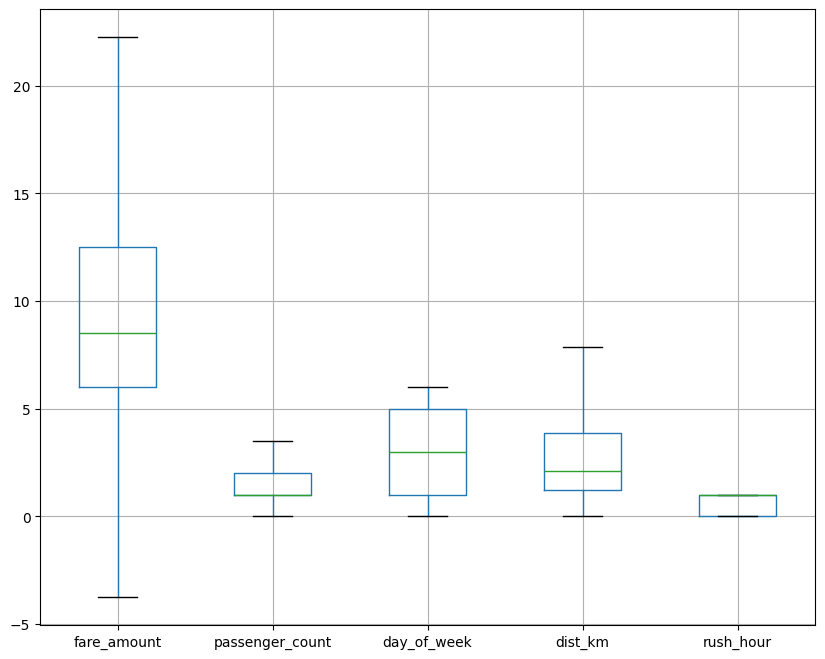

In [36]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.show()

<Axes: >

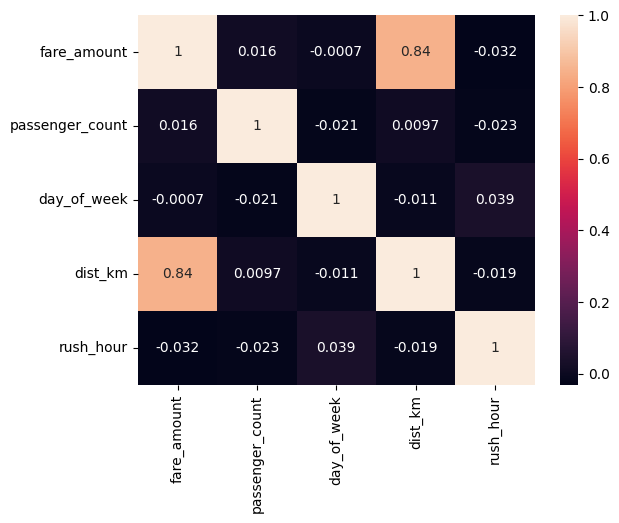

In [54]:
sns.heatmap(df.corr(),annot=True)

In [37]:
x = df.drop('fare_amount',axis=1)
Y = df['fare_amount']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size = 0.25, random_state=10)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred = model.predict(x_test)

In [42]:
from sklearn.metrics import r2_score
acc = r2_score(y_test,y_pred)
print(acc)

0.7096000426955169


In [43]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

2.933943301886305
